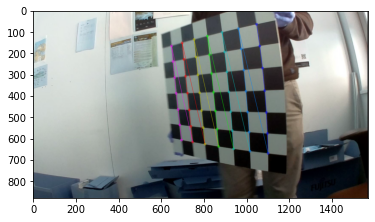

In [33]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,7), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
    
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,7), corners2, ret)
        plt.imshow(img)

In [34]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("Camera Calibration:\n ",ret)
print("\nCamera Matrix:\n ",mtx)
print("\nDistortion Parameters\n: ",dist)
print("\nRotation Vectors:\n ",rvecs)
print("\nTranslation Vectors:\n ",tvecs)

Camera Calibration:
  0.4045990380505826

Camera Matrix:
  [[1.16358169e+03 0.00000000e+00 7.63477978e+02]
 [0.00000000e+00 1.09218189e+03 3.13264979e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Parameters
:  [[-0.3934408   0.02901553  0.0016221  -0.00344401  0.46321703]]

Rotation Vectors:
  [array([[0.66453929],
       [0.60905414],
       [1.37887039]])]

Translation Vectors:
  [array([[ 2.59970993],
       [-2.39883454],
       [10.07942197]])]


In [35]:
img = cv.imread('Capture13.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

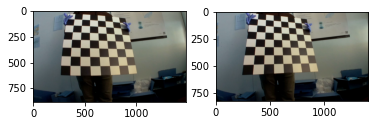

In [36]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(dst)

In [32]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.05780002752127361
